# Examination of the Nelson Siegel Svensson Curve Type

The NSS Curve Type is a parametric equation designed for fitting interest rate term structures.

In [1]:
from financepy.market.curves.discount_curve_nss import DiscountCurveNSS

####################################################################
#    FINANCEPY Version 1.1 - This build: 27 Aug 2025 at 13:28      #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from financepy.utils import *

In [3]:
curve_dt = Date(1,1,2020)

In [4]:
tau_1 = 2.0
tau_2 = 0.5
times = np.linspace(0.01, 10.0, 50)
dates = curve_dt.add_years(times)

We need to associate a day count and annual_frequency with these rates - we do not automatically assume they the parametrisation is for a continuously compounded rate.

In [5]:
freq_type = FrequencyTypes.ANNUAL
dc_type = DayCountTypes.ACT_365F

In [6]:
curve1 = DiscountCurveNSS(curve_dt, 1., 0., 0., 0., tau_1, tau_2, freq_type, dc_type)
factor1loading = curve1.zero_rate(dates)
curve2 = DiscountCurveNSS(curve_dt, 0., 1., 0., 0., tau_1, tau_2, freq_type, dc_type)
factor2loading = curve2.zero_rate(dates)
curve3 = DiscountCurveNSS(curve_dt, 0., 0., 1., 0., tau_1, tau_2, freq_type, dc_type)
factor3loading = curve3.zero_rate(dates)
curve4 = DiscountCurveNSS(curve_dt, 0., 0., 0., 1., tau_1, tau_2, freq_type, dc_type)
factor4loading = curve4.zero_rate(dates)

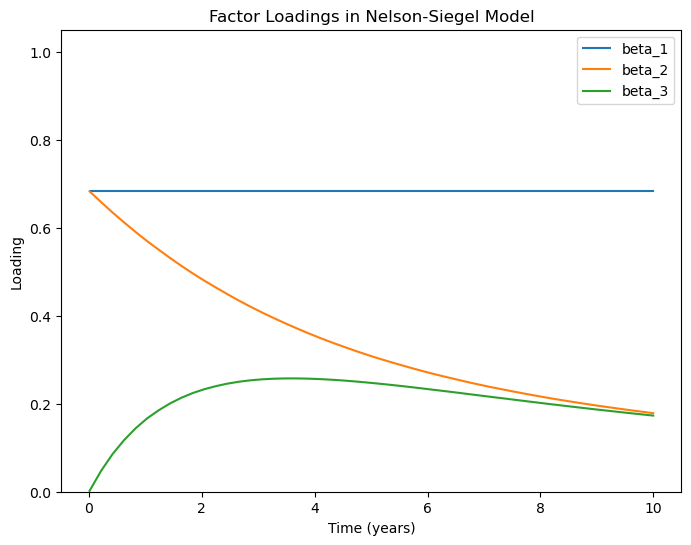

In [7]:
plt.figure(figsize = (8,6))
plt.plot(times,scale(factor1loading,1),label='beta_1');
plt.plot(times,scale(factor2loading,1),label='beta_2');
plt.plot(times,scale(factor3loading,1),label='beta_3');
plt.ylim((0,1.05))

plt.title('Factor Loadings in Nelson-Siegel Model');
plt.xlabel('Time (years)');
plt.ylabel('Loading');
plt.legend(loc='best')

In [8]:
beta_1 = 0.03
beta_2 = -0.02
beta_3 = -0.02
beta_4 = 0.08
curve1 = DiscountCurveNSS(curve_dt, beta_1, beta_2, beta_3, beta_4, tau_1, tau_2)
zero_rates1 = curve1.zero_rate(dates)

In [9]:
beta_1 = 0.04
beta_2 = -0.02
beta_3 = -0.02
beta_4 = 0.08
curve2 = DiscountCurveNSS(curve_dt, beta_1, beta_2, beta_3, beta_4, tau_1, tau_2)
zero_rates2 = curve2.zero_rate(dates)

In [10]:
beta_1 = 0.05
beta_2 = -0.02
beta_3 = -0.02
beta_4 = 0.08
curve3 = DiscountCurveNSS(curve_dt, beta_1, beta_2, beta_3, beta_4, tau_1, tau_2)
zero_rates3 = curve3.zero_rate(dates)

In [11]:
beta_1 = 0.06
beta_2 = -0.02
beta_3 = -0.02
beta_4 = 0.08
curve4 = DiscountCurveNSS(curve_dt, beta_1, beta_2, beta_3, beta_4, tau_1, tau_2)
zero_rates4 = curve4.zero_rate(dates)

In [12]:
beta_1 = 0.07
beta_2 = -0.02
beta_3 = -0.02
beta_4 = 0.08
curve5 = DiscountCurveNSS(curve_dt, beta_1, beta_2, beta_3, beta_4, tau_1, tau_2)
zero_rates5 = curve5.zero_rate(dates)

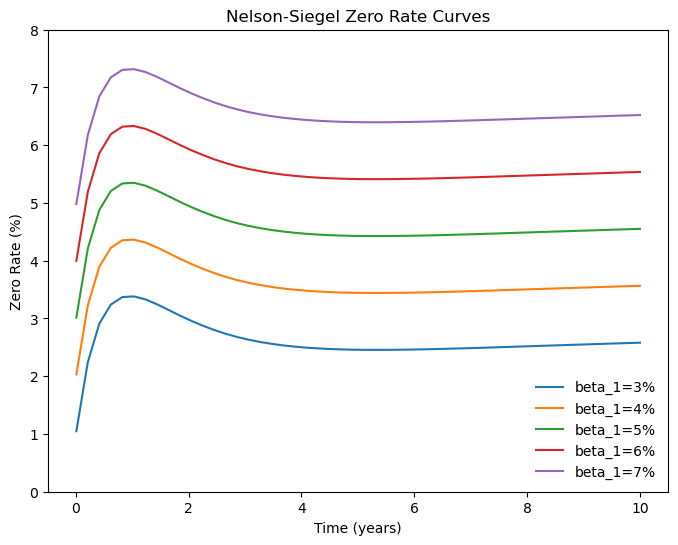

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(times, scale(zero_rates1, 100), label='beta_1=3%')
plt.plot(times, scale(zero_rates2, 100), label='beta_1=4%')
plt.plot(times, scale(zero_rates3, 100), label='beta_1=5%')
plt.plot(times, scale(zero_rates4, 100), label='beta_1=6%')
plt.plot(times, scale(zero_rates5, 100), label='beta_1=7%')
plt.ylim((0, 8))

plt.title('Nelson-Siegel Zero Rate Curves')
plt.xlabel('Time (years)')
plt.ylabel('Zero Rate (%)')
plt.legend(loc='lower right', frameon=False)

In [14]:
maturity_dt = curve_dt.add_years(5.0)

In [15]:
curve1.df(maturity_dt)

np.float64(0.8827128550061853)

In [16]:
curve1.zero_rate(maturity_dt)

np.float64(0.02458232980949878)

In [17]:
curve1.fwd_rate(maturity_dt, "1M")

np.float64(0.024065144169622472)

In [18]:
curve1.fwd(maturity_dt)

np.float64(0.02429309098932164)

Copyright (c) 2020 Dominic O'Kane